# Unit 5 - Financial Planning

In [104]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

import pytz

%matplotlib inline

In [105]:
# Load .env environment variables, including API keys
# Confirms .env environment file exists in current or higher parent directory by returning 'True'
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [106]:
# Set current amount of crypto assets, bitcoin and ethereum, for the average credit union member
btc_coins = 1.2
eth_coins = 5.3

In [107]:
# Crypto API URLs.  These are open APIs not secured with keys.
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [108]:
# Fetch current BTC price using Python 'requests' library 'get' method
btc_response_data=requests.get(btc_url)
# Inspect fetched BTC data connection response status and content
print(btc_response_data.status_code) # Code 200 or 300 indicates success
print(btc_response_data.content)
# Format the content data using 'json' library for readability, and inspect
btc_response_data_formatted = btc_response_data.json()
print(json.dumps(btc_response_data_formatted, indent=4))
# Capture the data id for the crytpo asset, and inspect
btc_data_id = list(btc_response_data_formatted['data'].keys())[0] # Dictionaries no longer subscriptable in Python 3 due to ordering not guaranteed; therefore, coerced to list and then sliced.
print(btc_data_id)
# Capture the current BTC price located within the json dictionary by making reference to the data id, and inspect
btc_current_price = btc_response_data_formatted['data'][btc_data_id]['quotes']['USD']['price']
print(btc_current_price)

# Fetch current ETH price using Python 'requests' library 'get' method
eth_response_data=requests.get(eth_url)
# Inspect fetched ETH data connection response status and content
print(eth_response_data.status_code) # Code 200 or 300 indicates success
print(eth_response_data.content)
# Format the content data using 'json' library, for readability, and inspect
eth_response_data_formatted = eth_response_data.json()
print(json.dumps(eth_response_data_formatted, indent=4))
# Capture the data id for the crytpo asset, and inspect
eth_data_id = list(eth_response_data_formatted['data'].keys())[0] # Dictionaries no longer subscriptable in Python 3 due to ordering not guaranteed; therefore, coerced to list and then sliced.
print(eth_data_id)
# Capture the current BTC price located within the json dictionary by making reference to the data id, and inspect
eth_current_price = eth_response_data_formatted['data'][eth_data_id]['quotes']['USD']['price']
print(eth_current_price)

# Compute current value of my crpto
my_btc = btc_coins
my_eth = eth_coins
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC at ${btc_current_price:0,.2f} per coin is ${my_btc_value:0,.2f}.")
print(f"The current value of your {my_eth} ETH at ${eth_current_price:0,.2f} per coin is ${my_eth_value:0,.2f}.")

200
b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 19440356,\n\t\t\t"total_supply": 19440356,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 29406.0000000000000000,\n\t\t\t\t\t"volume_24h": 9423579553,\n\t\t\t\t\t"market_cap": 571775887644,\n\t\t\t\t\t"percentage_change_1h": -0.0046493724167324,\n\t\t\t\t\t"percentage_change_24h": 0.6430162742487640,\n\t\t\t\t\t"percentage_change_7d": -2.7051153540159300,\n\t\t\t\t\t"percent_change_1h": -0.0046493724167324,\n\t\t\t\t\t"percent_change_24h": 0.6430162742487640,\n\t\t\t\t\t"percent_change_7d": -2.7051153540159300\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1690445398\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1690445398,\n\t\t"num_cryptocurrencies": 3119,\n\t\t"error": null\n\t}\n}'
{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
  

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [109]:
# Set current amount of shares
agg_shares = 200
spy_shares = 110
my_agg = agg_shares
my_spy = spy_shares

In [110]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_api_secret_key = os.getenv('ALPACA_SECRET_KEY')
#print(alpaca_api_key, alpaca_api_secret_key) #verified and validated

# Create the Alpaca API object, and validate
alpaca = tradeapi.REST(alpaca_api_key, alpaca_api_secret_key, api_version = 'v2')
#print(alpaca)

In [111]:
# Determine SPY and AGG latest closing prices using Alpaca API

# Determine latest closing date as current date and Format current date as ISO format
# import pandas functions to help with determining latest closing date
#from pandas.tseries.holiday import USFederalHolidayCalendar
#from pandas.tseries.offsets import CustomBusinessDay
current_date = pd.Timestamp.today().date()
#print(current_date)
# Go back to the latest business closing date, taking into account US federal holidays
latest_close_date = current_date - pd.offsets.CustomBusinessDay(n=1, calendar=USFederalHolidayCalendar()) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.tseries.offsets.CustomBusinessDay.html
#print(latest_close_date)

#current_date = '2020-08-07' # Assignment static date
#print(current_date)

# Identify time zone codes for use in normalizing dates in the ISO format
#import pytz
#print(pytz.all_timezones)

# Assign the latest closing date to both the start and end dates, as we want a single day price quote, and normalize dates in the ISO format with East Coast time zone for alpaca api 'get_bars' function call
start_date = pd.Timestamp(latest_close_date, tz='America/New_York').isoformat()
end_date = pd.Timestamp(latest_close_date, tz='America/New_York').isoformat()
#print(start_date, end_date)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
investment_assets_df = alpaca.get_bars(tickers, timeframe, start=start_date, end = end_date).df
#print(investment_assets_df)

# Reorganize the DataFrame
# Separate ticker data.
# Extract as series the close price for each ticker symbol, drop other fields.  Code block below streamlines in-class instruction.
agg_latest_prices_df = investment_assets_df[investment_assets_df['symbol']==tickers[0]]
#print(agg_latest_prices_df)
# Coerce AGG close price into dataframe
agg_latest_close_price_df = agg_latest_prices_df [['close']].rename(columns={'close':tickers[0]})
#print(agg_latest_close_price_df)
spy_latest_prices_df = investment_assets_df[investment_assets_df['symbol']==tickers[1]]
#print(spy_latest_prices_df)
# Coerce SPY close price into dataframe
spy_latest_close_price_df = spy_latest_prices_df[['close']].rename(columns={'close':tickers[1]})
#print(spy_latest_close_price_df.info())

# Concatenate the ticker DataFrames
investment_assets_latest_close_prices_df = pd.concat([agg_latest_close_price_df,spy_latest_close_price_df], axis='columns')
# Drop time property from timestamp index by referencing index's date attribute only
investment_assets_latest_close_prices_df.index = investment_assets_latest_close_prices_df.index.date
#print(investment_assets_latest_close_prices_df.info())

# Preview DataFrame
# Note: Dataframe reflects latest daily closing prices for ticker symbols AGG and SPY.  All other fields, including open, high, low, volume, trade_count, vwap, symbol are\
# unncessary to retain in memory for this assignment going forward and have been dropped by design.
investment_assets_latest_close_prices_df

,AGG,SPY
2023-07-26,98.02,455.51


In [112]:
# Pick AGG and SPY close prices.  Look up values from Dataframe object, indexed as a dictionary.
agg_latest_close_price = investment_assets_latest_close_prices_df[tickers[0]][0]
#print(agg_latest_close_price)
spy_latest_close_price = investment_assets_latest_close_prices_df[tickers[1]][0]
#print(spy_latest_close_price)
agg_close_price = agg_latest_close_price
spy_close_price = spy_latest_close_price

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.02
Current SPY closing price: $455.51


In [113]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares at ${spy_close_price} per share is ${my_spy_value:0,.2f}.")
print(f"The current value of your {my_agg} AGG shares at ${agg_close_price} per share is ${my_agg_value:0,.2f}.")

The current value of your 110 SPY shares at $455.51 per share is $50,106.10.
The current value of your 200 AGG shares at $98.02 per share is $19,604.00.


### Savings Health Analysis

In [114]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data for crypto wallet and investment assets
cryptocurrency_wallet = my_btc_value + my_eth_value
investment_assets = my_agg_value + my_spy_value

# Create savings DataFrame
savings_data = [cryptocurrency_wallet, investment_assets]
df_savings = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,45202.546
stock/bond,69710.100


<Axes: title={'center': 'Your Credit Union Member Savings Chart'}, ylabel='savings shares'>

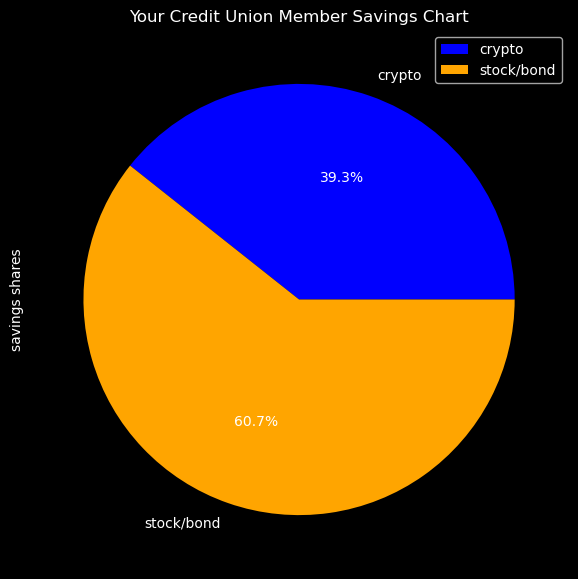

In [115]:
# Plot savings pie chart
df_savings.plot(kind='pie',figsize=(7,7), title='Your Credit Union Member Savings Chart', autopct='%.1f%%', colors = ['blue', 'orange'], y='amount', ylabel='savings shares')

In [116]:
# Set ideal emergency fund value at three times monthly income
emergency_fund_value_need = monthly_income * 3

# Calculate total amount of savings

total_current_member_savings = df_savings.amount.sum()
print(f"Credit Union Member's current savings amount: {total_current_member_savings:0,.2f}\n")

#total_current_member_savings = 0.0 * emergency_fund_value_need #Test savings scenarios to validate if, elif, else statement block below
#total_current_member_savings = 1.0 * emergency_fund_value_need #Test savings scenarios to validate if, elif, else statement block below
#total_current_member_savings = 1.1 * emergency_fund_value_need #Test savings scenarios to validate if, elif, else statement block below

# Validate credit union member's saving health via if statements and logical operators
#If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.
if total_current_member_savings > emergency_fund_value_need:
    print("Congratulations credit union member!  You have enough money in your emergency fund.")
#Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.
elif total_current_member_savings == emergency_fund_value_need:
    print("Congratulations credit union member on reaching your financial savings goal!  This is an important milestone as you now have enough money in your emergency fund.")
#Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal.
else:
    print(f"Dear credit union member:  Keep working toward your financial savings goal.  You are ${(emergency_fund_value_need - total_current_member_savings):0,.2f} away from having enough money in your emergency fund.")

Credit Union Member's current savings amount: 114,912.65

Congratulations credit union member!  You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [117]:
# Use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:
# Set start and end dates for three years of historical data back from today.
start_date_mc = pd.Timestamp('2020-07-21', tz='America/New_York').isoformat()
end_date_mc = pd.Timestamp('2023-07-21', tz='America/New_York').isoformat()

In [118]:
# Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG). 
# Get 3 years' worth of historical data for SPY and AGG
# Set the tickers
tickers_mc = ["AGG", "SPY"]
# Set timeframe to "1Day" for Alpaca API
timeframe_mc = "1Day"
# Get current closing prices for SPY and AGG
investment_assets_mc_df = alpaca.get_bars(tickers_mc, timeframe_mc, start=start_date_mc, end = end_date_mc).df
#print(investment_assets_mc_df)

# Reorganize the DataFrame
# Separate ticker data.
# Extract as series the close price for each ticker symbol, drop other fields.  Code block below streamlines in-class instruction.
agg_prices_mc_df = investment_assets_mc_df[investment_assets_mc_df['symbol']==tickers[0]]
#print(agg_prices_mc_df)
# Coerce AGG close prices into dataframe
agg_close_prices_mc_df = agg_prices_mc_df[['close']]
spy_prices_mc_df = investment_assets_mc_df[investment_assets_mc_df['symbol']==tickers[1]]
#print(spy_prices_mc_df)
# Coerce SPY close prices into dataframe
spy_close_prices_mc_df = spy_prices_mc_df[['close']]

# Concatenate the ticker DataFrames
investment_assets_close_prices_mc_df = pd.concat([agg_close_prices_mc_df,spy_close_prices_mc_df], axis='columns', keys=tickers_mc)
#print(investment_assets_close_prices_mc_df)
# Drop time property from timestamp index by referencing index's date attribute only
investment_assets_close_prices_mc_df.index = investment_assets_close_prices_mc_df.index.date
#print(investment_assets_close_prices_mc_df.info())

# Preview DataFrame by displaying sample data
# Note: Dataframe reflects last three years of closing prices for ticker symbols AGG and SPY.  All other fields, including open, high, low, volume, trade_count, vwap, symbol are \
# unncessary to retain in memory for this assignment going forward, and have been dropped by design.
display(investment_assets_close_prices_mc_df.head(10))
display(investment_assets_close_prices_mc_df.info())

,AGG,SPY
,close,close
2020-07-21,119.08,324.90
2020-07-22,119.18,326.82
2020-07-23,119.32,322.95
2020-07-24,119.28,320.91
2020-07-27,119.20,323.27
2020-07-28,119.28,321.30
2020-07-29,119.42,325.01
2020-07-30,119.51,323.98
2020-07-31,119.56,326.40


<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 2020-07-21 to 2023-07-21
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (AGG, close)  756 non-null    float64
 1   (SPY, close)  756 non-null    float64
dtypes: float64(2)
memory usage: 17.7+ KB


None

### Simulate 30-year portfolio growth using Monte Carlo simulation

In [119]:
# Configuring a Monte Carlo simulation to forecast 30-year cumulative returns for a 60/40 portfolio consisting of 60% SPY and 40% AGG, simulate 500 times.
# MCSimulation module documentation for MCForecastTools library, use command: '?MCSimulation'

# Review MCSimulation class object documentation
#?MCSimulation

# Monte Carlo simulation assumptions
# Assume 252 trading days per trading year
# weights variable enters as 40% AGG, 60% SPY
ticker_weights_mc = [0.40, 0.60]
# num_simulation argument enters as 500 monte carlo trials for this simulation
# num_trading_days argument enters as 30 years @ 252 trading days per trading year
# portfolio_data argument enters as raw list of individual securities' prices, in this case closing prices for both AGG and SPY. \
# It is not necessary to calculate investment assets and portfolio returns for the portfolio_data argument variable, MCSimulation module already handles this

# Prepare the 30-year Monte Carlo simulation based on inputs and assumptions outlined above
MC_30_year = MCSimulation(
    portfolio_data = investment_assets_close_prices_mc_df,
    weights = ticker_weights_mc,
    num_simulation = 500,
    num_trading_days = 252*30)

In [120]:
# Display the simulation input data.
# Simulation input dataset is the last 3 years of portfolio daily returns, where the portfolio is defined as \
# 40% bonds: ticker proxy AGG, the U.S. aggregate bond index exchange-traded fund and \
# 60% stocks: ticker proxy SPY, the U.S. S&P 500 index ETF
# Input dataset generated by MCSimulation's transformation of investment assets' daily closing prices to daily returns, previewed below:
display(MC_30_year.portfolio_data.head(10)) # Investment assets' 'daily_return' data verified
display(MC_30_year.portfolio_data.info())

AGG                  SPY             
             close daily_return   close daily_return
2020-07-21  119.08          NaN  324.90          NaN
2020-07-22  119.18     0.000840  326.82     0.005910
2020-07-23  119.32     0.001175  322.95    -0.011841
2020-07-24  119.28    -0.000335  320.91    -0.006317
2020-07-27  119.20    -0.000671  323.27     0.007354
2020-07-28  119.28     0.000671  321.30    -0.006094
2020-07-29  119.42     0.001174  325.01     0.011547
2020-07-30  119.51     0.000754  323.98    -0.003169
2020-07-31  119.56     0.000418  326.40     0.007470
2020-08-03  119.40    -0.001338  328.67     0.006955

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 2020-07-21 to 2023-07-21
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (AGG, close)         756 non-null    float64
 1   (AGG, daily_return)  755 non-null    float64
 2   (SPY, close)         756 non-null    float64
 3   (SPY, daily_return)  755 non-null    float64
dtypes: float64(4)
memory usage: 45.7+ KB


None

In [121]:
# Running a Monte Carlo simulation of 500 trials to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 110.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 120.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 130.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 140.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 150.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 160.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 170.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 180.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 190.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 200.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 210.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 220.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 230.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 240.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 250.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 260.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 270.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 280.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 290.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 300.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 310.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 320.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 330.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 340.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 350.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 360.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 370.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 380.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 390.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 400.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 410.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 420.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 430.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 440.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 450.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 460.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 470.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 480.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 490.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998447,1.001259,1.000189,0.997388,0.992763,1.008640,0.996648,0.996760,1.014419,0.986340,...,0.992872,1.012032,0.995269,1.005683,0.995417,1.001825,0.999310,0.997576,1.015349,1.007654
2,0.991942,0.993809,0.988883,0.996570,0.988462,1.016401,0.994307,1.001097,1.016226,0.988486,...,0.992390,1.024253,0.993553,1.012704,0.998851,1.002300,0.998680,0.997573,1.026430,1.007549
3,0.984759,0.998037,0.993231,0.994622,0.989716,1.008451,0.989201,1.005299,1.012441,0.981104,...,0.985181,1.015812,0.998547,1.014608,0.997147,0.999091,0.991990,1.005395,1.029413,1.006788
4,0.988792,1.003001,0.995636,0.995612,0.990967,1.004033,0.997217,1.001256,1.004150,0.986405,...,0.982692,1.006737,0.993760,1.015839,1.000627,1.000734,0.984273,1.000799,1.043104,1.022041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.781674,6.930562,8.333897,4.049155,4.686956,5.950880,5.965653,10.277831,6.287089,5.265969,...,1.374277,6.768372,3.610266,5.386813,3.186773,2.573910,1.444561,3.255257,11.691899,4.026477
7557,6.844178,6.891069,8.354756,4.027839,4.692128,5.900566,6.027724,10.148540,6.210964,5.240547,...,1.377950,6.760490,3.596253,5.380415,3.153321,2.560681,1.446825,3.253774,11.693081,4.015793
7558,6.848116,6.873670,8.347764,4.078395,4.733911,5.865403,6.072356,10.108730,6.244998,5.184697,...,1.365364,6.757113,3.594047,5.426365,3.153684,2.617009,1.441114,3.210550,11.732877,4.009999
7559,6.883528,6.888321,8.317776,4.139327,4.753932,5.834143,6.100871,10.061445,6.211258,5.164332,...,1.358005,6.711196,3.575995,5.425889,3.124388,2.604342,1.435197,3.169155,11.723505,4.038211


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

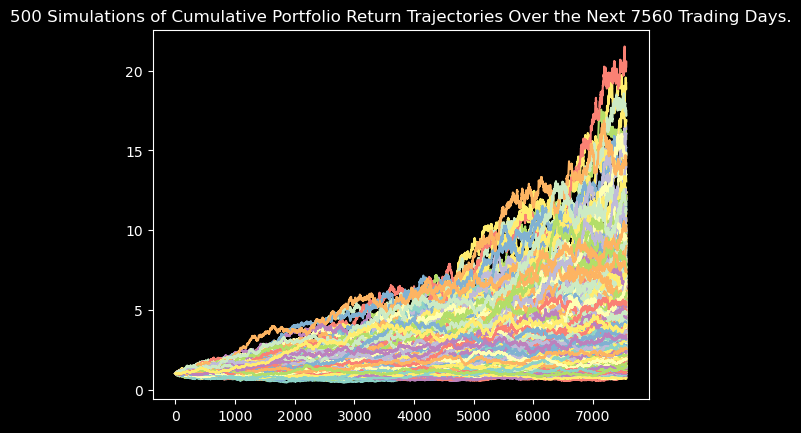

In [122]:
# Plot simulation's 500 trial outcomes
# 500 trials of simulated daily returns accumulated over 30 years, assuming a starting portfolio of 60% SPY, 40% AGG
MC_30_year.plot_simulation()
#MC_30_year.plot_simulation().get_figure().savefig('MC_30_year_simulation_500_trials_plot.png', bbox_inches='tight') 

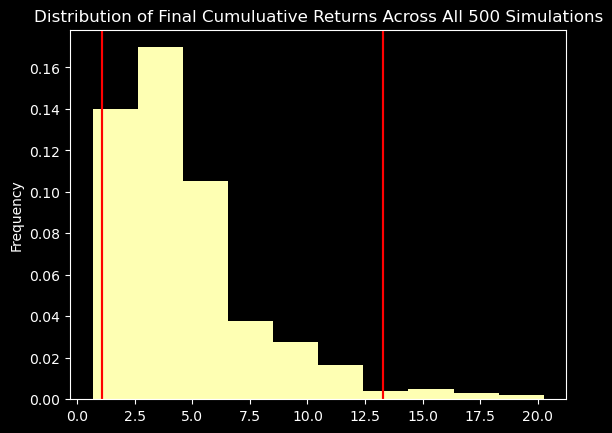

In [123]:
# Plot probability distribution along with 95% confidence interval (the range from the 2.5 to 97.5 percentile)
MC_30_year.plot_distribution()
MC_30_year.plot_distribution().get_figure().savefig('MC_30_year_distribution_plot.png', bbox_inches='tight') 

### Retirement Analysis

In [124]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30_year_describe = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print('30-Year Simulation Summary Statistics:\n\n',MC_30_year_describe)

30-Year Simulation Summary Statistics:

 count           500.000000
mean              4.659385
std               3.144270
min               0.686960
25%               2.545265
50%               3.791443
75%               5.711755
max              20.250273
95% CI Lower      1.084358
95% CI Upper     13.291036
Name: 7560, dtype: float64


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [125]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = MC_30_year.confidence_interval[0]*initial_investment
#print(ci_lower)
ci_upper = MC_30_year.confidence_interval[1]*initial_investment
#print(ci_upper)

# Determine the median outcome, or 50th percentile
median_30 = MC_30_year_describe[5]*initial_investment
#print(median_30)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.2f} in the portfolio"
      f" over the next 30 years will end within a range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f},"
      f" with a median average value of ${median_30:0,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within a range of $21,687.16 and $265,820.72, with a median average value of $75,828.86


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [126]:
# Increase initial investment amount 50% from $20k to $30k
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of possible outcomes for our increased initial investment of $30,000
ci_lower = MC_30_year.confidence_interval[0]*initial_investment
#print(ci_lower)
ci_upper = MC_30_year.confidence_interval[1]*initial_investment
#print(ci_upper)

# Determine the median outcome, or 50th percentile
median_30 = MC_30_year_describe[5]*initial_investment
#print(median_30)

# Print results.
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.2f} in the portfolio"
      f" over the next 30 years will end in a range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f},"
      f" with a median average value of ${median_30:0,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end in a range of $32,530.74 and $398,731.08, with a median average value of $113,743.29


### Ten Years Retirement Option: Our credit union CTO wonders whether the traditional 30 years is a long time to wait until retirement.  As a result of feedback from management, we are adjusting the retirement portfolio and running a new Monte Carlo simulation to find out if the changes will allow members to retire earlier in ten years.

In [127]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns for portfolio of 40% AGG, 60% SPY.
# The simulation runs 500 individual trials
# Two assumptions are changed from the 30-Year to 10-Year simulation:
# 1) The 'num_trading_days' variable is modified from 30 years to 10 years @ 252 trading days per year.
# 2) The portfolio is constructed differently, shifting weight from bonds to stocks, in order to generate higher expected returns and larger expected portfolio that could support early retirement, although variability, or risk around expected returns will increase.
# The new portfolio asset weights are now 80% stocks (SPY) and 20% bonds (AGG) for the 10-year simulation, up from 60% stocks (SPY) and 40% bond (AGG) in the 30-year simulation.
ticker_weights_10_yr_mc = [0.20, 0.80] 
# Note that MCSimulation assumes daily rebalancing, such that the portfolio is always 80/20 stocks/bonds (SPY/AGG).

MC_10_year = MCSimulation(portfolio_data = investment_assets_close_prices_mc_df,
    weights = ticker_weights_10_yr_mc,
    num_simulation = 500,
    num_trading_days = 252*10)

In [128]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 120.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 130.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 140.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 170.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 180.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 210.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 220.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 230.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013743,0.992757,0.999830,1.012406,0.997103,0.991885,1.006094,1.005112,1.001558,1.019355,...,1.011455,0.983252,0.996250,1.008029,1.004553,1.005091,1.013636,0.982520,0.998068,1.002546
2,1.010512,0.990839,1.011437,1.005948,1.009322,1.000629,1.014164,1.005613,0.979780,1.019519,...,1.015587,0.976186,0.995877,1.009753,1.002925,1.006077,1.014808,0.978548,1.003708,1.018003
3,1.023876,1.002699,1.007883,1.005778,0.990951,1.003605,1.006290,1.016279,0.970763,1.011570,...,1.012171,0.969409,1.008485,1.002776,0.993632,1.001127,1.007258,0.979384,0.997125,1.021705
4,1.017722,1.012674,1.014816,1.016329,0.984655,0.997491,1.008611,1.034698,0.967849,1.001745,...,1.012091,0.976724,1.008899,1.005471,1.003076,0.993309,0.993546,0.996296,1.000013,1.024713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.074165,2.102702,1.755283,2.410426,3.520499,2.276162,1.489992,1.292992,1.852465,2.041554,...,3.095813,2.794439,1.901564,3.135851,2.140060,5.977477,1.409607,3.110071,1.092923,0.902832
2517,2.098607,2.080007,1.776797,2.433197,3.503367,2.288984,1.471571,1.277851,1.817666,2.048650,...,3.092132,2.789591,1.904585,3.129732,2.136117,5.957096,1.410343,3.047855,1.104727,0.900160
2518,2.089029,2.075042,1.797813,2.394420,3.517627,2.249069,1.472512,1.269034,1.851212,2.036314,...,3.103061,2.793673,1.874600,3.099486,2.133271,5.927850,1.403223,3.079660,1.119043,0.903787
2519,2.075279,2.074185,1.806317,2.392041,3.467501,2.299619,1.466660,1.275418,1.831692,2.032156,...,3.158562,2.792832,1.844902,3.057816,2.165655,5.810599,1.396089,3.057732,1.122109,0.895271


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

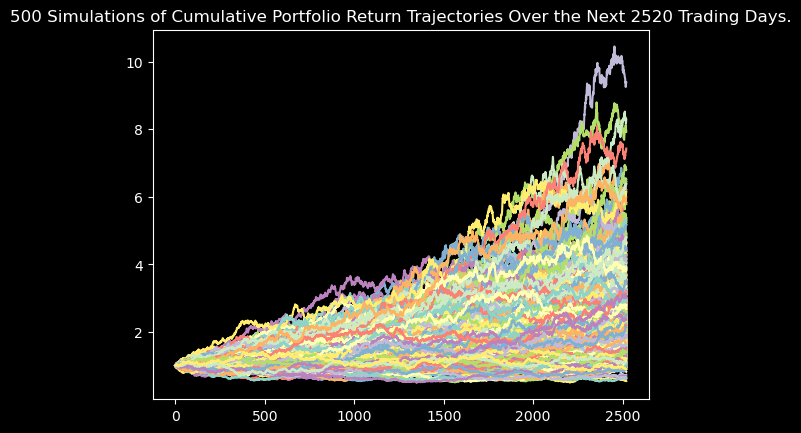

In [129]:
# Plot simulation outcomes
MC_10_year.plot_simulation()
#MC_10_year.plot_simulation().get_figure().savefig('MC_10_year_simulation_500_trials_plot.png', bbox_inches='tight') 

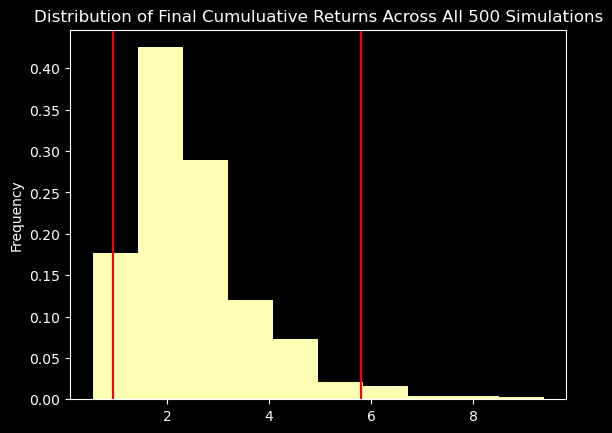

In [130]:
# Plot probability distribution along with 95% confidence interval (the range from the 2.5 to 97.5 percentile)
MC_10_year.plot_distribution()
MC_10_year.plot_distribution().get_figure().savefig('MC_10_year_distribution_plot.png', bbox_inches='tight')

In [131]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_10_year_describe = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print('10-Year Simulation Summary Statistics:\n\n',MC_10_year_describe)

10-Year Simulation Summary Statistics:

 count           500.000000
mean              2.496927
std               1.249826
min               0.542695
25%               1.650254
50%               2.223552
75%               2.983756
max               9.384233
95% CI Lower      0.941594
95% CI Upper      5.804983
Name: 2520, dtype: float64


/Users/bozmbp18/Tresorit/Boz & Company LLC/IAR/Todd Meier/Education/Columbia Engineering/CU-VIRT-FIN-PT-06-2023-U-LOLC/GitHub_Repository/CU-VIRT-FIN-PT-06-2023-U-LOLC/Week_05/Homework/api-challenge/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [132]:
# Set initial investment
# We will assume the credit union member's initial investment is the current market value today of 200 AGG shares and 110 SPY shares, as stated at the outset of this project.
initial_investment = investment_assets

# The initial investment is reallocated to 80% stocks (SPY) and 20% bonds (AGG) for purposes of the 10-year Monte Carlo simulation.
print(f"Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our ${initial_investment:0,.2f} initial investment.")
ci_lower_ten = MC_10_year.confidence_interval[0]*initial_investment
ci_upper_ten = MC_10_year.confidence_interval[1]*initial_investment

# Determine the median outcome for the retirement portfolio, or 50th percentile
median_10 = MC_10_year_describe[5]*initial_investment
#print(median_10)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.2f} in the portfolio"
      f" over the next 10 years will end within a range of"
      f" ${ci_lower_ten:0,.2f} and ${ci_upper_ten:0,.2f},"
      f" with a median average value of ${median_10:0,.2f}")

Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $69,710.10 initial investment.
There is a 95% chance that an initial investment of $69,710.10 in the portfolio over the next 10 years will end within a range of $65,638.64 and $404,665.91, with a median average value of $155,004.05


In [137]:
print(f"Early Retirement in 10 Years Conclusion: Based on the results of our 10-year simulation for an 80/20 stock/bond portfolio, with an initial investment of ${initial_investment:0,.2f},\n\
we recommend the credit union member not consider planning for early retirement in 10 years.\n")
      
print(f"The credit union member's current investment portfolio, excluding speculative cryptocurrencies, is ${initial_investment:0,.2f}.\n\
The median value of this portfolio after 10 years is expected to be ${median_10:0,.2f}, and therefore last no more than {median_10/monthly_income:0,.2f} months at retirement, assuming the need to replace at least ${monthly_income:0,.2f} of current monthly income.\n\
Furthermore, at the low end of the 95% confidence interval, the member's investment portfolio may actually decline over the next 10 years to ${ci_lower_ten:0,.2f}.\n\
However, this doesn't mean the member cannot reevaluate their portfolio and retirement circumstances in 10 years, given there is potentially large upside within the 95% confidence interval to ${ci_upper_ten:0,.2f},\n\
but the member TODAY should not plan on retiring in 10 years.") 

Early Retirement in 10 Years Conclusion: Based on the results of our 10-year simulation for an 80/20 stock/bond portfolio, with an initial investment of $69,710.10,
we recommend the credit union member not consider planning for early retirement in 10 years.

The credit union member's current investment portfolio, excluding speculative cryptocurrencies, is $69,710.10.
The median value of this portfolio after 10 years is expected to be $155,004.05, and therefore last no more than 12.92 months at retirement, assuming the need to replace at least $12,000.00 of current monthly income.
Furthermore, at the low end of the 95% confidence interval, the member's investment portfolio may actually decline over the next 10 years to $65,638.64.
However, this doesn't mean the member cannot reevaluate their portfolio and retirement circumstances in 10 years, given there is potentially large upside within the 95% confidence interval to $404,665.91,
but the member TODAY should not plan on retiring in 10 